In [12]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

# Phase 1

Show first five results

In [13]:
raw_data = pl.read_csv('Video_Games_Sales.csv', ignore_errors=True)
raw_data.head(5)

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
str,str,i64,str,str,f64,f64,f64,f64,f64,i64,i64,f64,i64,str,str
"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,"""Nintendo""","""E"""
"""Super Mario Br…","""NES""",1985,"""Platform""","""Nintendo""",29.08,3.58,6.81,0.77,40.24,null,null,null,null,null,null
"""Mario Kart Wii…","""Wii""",2008,"""Racing""","""Nintendo""",15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,"""Nintendo""","""E"""
"""Wii Sports Res…","""Wii""",2009,"""Sports""","""Nintendo""",15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,"""Nintendo""","""E"""
"""Pokemon Red/Po…","""GB""",1996,"""Role-Playing""","""Nintendo""",11.27,8.89,10.22,1.0,31.37,null,null,null,null,null,null


Check for nulls using bool

In [14]:
check_nulls =raw_data.select(pl.col('Name'), 
                pl.col(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer','Rating']).is_null())

check_nulls

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool
"""Wii Sports""",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""Super Mario Br…",false,false,false,false,false,false,false,false,false,true,true,true,true,true,true
"""Mario Kart Wii…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""Wii Sports Res…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""Pokemon Red/Po…",false,false,false,false,false,false,false,false,false,true,true,true,true,true,true
"""Tetris""",false,false,false,false,false,false,false,false,false,true,true,true,true,true,true
"""New Super Mari…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""Wii Play""",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false
"""New Super Mari…",false,false,false,false,false,false,false,false,false,false,false,false,false,false,false


Count how many null values in each column

In [15]:
null_counts = raw_data.null_count()[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Critic_Score', 'Critic_Count','User_Score', 'User_Count', 'Developer', 'Rating']]
null_counts

Name,Platform,Year_of_Release,Genre,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2,0,269,2,8582,8582,9129,9129,6623,6769


Show null values of each column with Heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Name'),
  Text(1.5, 0, 'Platform'),
  Text(2.5, 0, 'Year_of_Release'),
  Text(3.5, 0, 'Genre'),
  Text(4.5, 0, 'Critic_Score'),
  Text(5.5, 0, 'Critic_Count'),
  Text(6.5, 0, 'User_Score'),
  Text(7.5, 0, 'User_Count'),
  Text(8.5, 0, 'Developer'),
  Text(9.5, 0, 'Rating')])

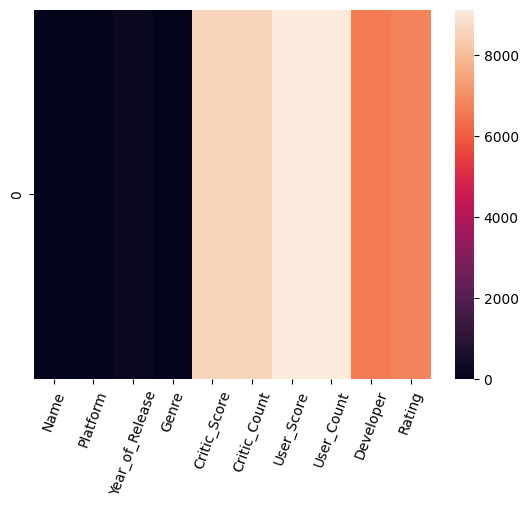

In [16]:
sns.heatmap(null_counts.to_pandas())
plt.xticks(rotation=70)

In [17]:
clean = raw_data.drop_nulls()

clean

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
str,str,i64,str,str,f64,f64,f64,f64,f64,i64,i64,f64,i64,str,str
"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.36,28.96,3.77,8.45,82.53,76,51,8.0,322,"""Nintendo""","""E"""
"""Mario Kart Wii…","""Wii""",2008,"""Racing""","""Nintendo""",15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,"""Nintendo""","""E"""
"""Wii Sports Res…","""Wii""",2009,"""Sports""","""Nintendo""",15.61,10.93,3.28,2.95,32.77,80,73,8.0,192,"""Nintendo""","""E"""
"""New Super Mari…","""DS""",2006,"""Platform""","""Nintendo""",11.28,9.14,6.5,2.88,29.8,89,65,8.5,431,"""Nintendo""","""E"""
"""Wii Play""","""Wii""",2006,"""Misc""","""Nintendo""",13.96,9.18,2.93,2.84,28.92,58,41,6.6,129,"""Nintendo""","""E"""
"""New Super Mari…","""Wii""",2009,"""Platform""","""Nintendo""",14.44,6.94,4.7,2.24,28.32,87,80,8.4,594,"""Nintendo""","""E"""
"""Mario Kart DS""","""DS""",2005,"""Racing""","""Nintendo""",9.71,7.47,4.13,1.9,23.21,91,64,8.6,464,"""Nintendo""","""E"""
"""Wii Fit""","""Wii""",2007,"""Sports""","""Nintendo""",8.92,8.03,3.6,2.15,22.7,80,63,7.7,146,"""Nintendo""","""E"""
"""Kinect Adventu…","""X360""",2010,"""Misc""","""Microsoft Game…",15.0,4.89,0.24,1.69,21.81,61,45,6.3,106,"""Good Science S…","""E"""


Double checking publishers
Dropping Other Sales Column

In [18]:
clean = clean.filter(clean['Publisher'] != 'Unknown')

clean = clean.with_columns(pl.col('Critic_Score').apply(lambda x: x / 10))

clean['Developer'].unique().to_list()

['Codemasters',
 'Snowblind Studios',
 'Ubisoft, Sensory Sweep',
 'Dimps Corporation, SCE Japan Studio',
 'Telltale Games',
 'Pipeworks Software, Inc.',
 'TOYBOX',
 'Arzest',
 'Nightlight Studios',
 'JV Games Inc.',
 'KCEK',
 'Ghost Games',
 'Turtle Rock Studios',
 'Io Interactive, Nixxes Software',
 'Broadsword Interactive',
 'Volition Inc., Reactor Zero',
 'Locomotive Games',
 'Infinite Interactive',
 'Treyarch',
 'EA Vancouver',
 'Aspyr',
 '343 Industries',
 'Aki Corp.',
 '5TH Cell',
 'Coyote Developments',
 'Dusenberry Martin Racing',
 'Top Heavy Studios',
 '1C, 1C Company',
 '2D Boy',
 'Point of View',
 'Harmonix Music Systems, Demiurge Studios',
 'Eutechnyx, Deep Silver',
 'Gulti',
 'Paradox Development Studio',
 'Lead Pursuit',
 'Sunflowers Interactive',
 'SCEJ',
 'Sucker Punch',
 'Eighting, Takara Tomy',
 'Hypnos Entertainment',
 'Neversoft Entertainment, BudCat',
 'Big Red Button Entertainment',
 'Bandai Namco Games',
 'Imagineer',
 'AWE Games',
 'Moss',
 'Gearbox Software, 3D

Wanting more relevant data, looking for Global sales over 1

In [19]:
clean = clean.filter(clean['Global_Sales'] >= 1)
clean

Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
str,str,i64,str,str,f64,f64,f64,f64,f64,f64,i64,f64,i64,str,str
"""Wii Sports""","""Wii""",2006,"""Sports""","""Nintendo""",41.36,28.96,3.77,8.45,82.53,7.6,51,8.0,322,"""Nintendo""","""E"""
"""Mario Kart Wii…","""Wii""",2008,"""Racing""","""Nintendo""",15.68,12.76,3.79,3.29,35.52,8.2,73,8.3,709,"""Nintendo""","""E"""
"""Wii Sports Res…","""Wii""",2009,"""Sports""","""Nintendo""",15.61,10.93,3.28,2.95,32.77,8.0,73,8.0,192,"""Nintendo""","""E"""
"""New Super Mari…","""DS""",2006,"""Platform""","""Nintendo""",11.28,9.14,6.5,2.88,29.8,8.9,65,8.5,431,"""Nintendo""","""E"""
"""Wii Play""","""Wii""",2006,"""Misc""","""Nintendo""",13.96,9.18,2.93,2.84,28.92,5.8,41,6.6,129,"""Nintendo""","""E"""
"""New Super Mari…","""Wii""",2009,"""Platform""","""Nintendo""",14.44,6.94,4.7,2.24,28.32,8.7,80,8.4,594,"""Nintendo""","""E"""
"""Mario Kart DS""","""DS""",2005,"""Racing""","""Nintendo""",9.71,7.47,4.13,1.9,23.21,9.1,64,8.6,464,"""Nintendo""","""E"""
"""Wii Fit""","""Wii""",2007,"""Sports""","""Nintendo""",8.92,8.03,3.6,2.15,22.7,8.0,63,7.7,146,"""Nintendo""","""E"""
"""Kinect Adventu…","""X360""",2010,"""Misc""","""Microsoft Game…",15.0,4.89,0.24,1.69,21.81,6.1,45,6.3,106,"""Good Science S…","""E"""


Export dataframe to your desired location with no index column


In [20]:
clean.write_csv('Video_Games_Sales_cleaned.csv')